In [1]:
import os
import datetime

# TODO: add rest of observation dates from Iturbide
OBSV_DATES_APERS = {
    datetime.date(year=2022, month=10, day=21).strftime("%Y-%m-%d"): 10,
    datetime.date(year=2022, month=10, day=27).strftime("%Y-%m-%d"): 9,
    datetime.date(year=2022, month=11, day=5).strftime("%Y-%m-%d"): 10,
    datetime.date(year=2022, month=11, day=26).strftime("%Y-%m-%d"): 11,
    datetime.date(year=2022, month=12, day=6).strftime("%Y-%m-%d"): 11,
    datetime.date(year=2022, month=12, day=7).strftime("%Y-%m-%d"): 16,
    datetime.date(year=2022, month=12, day=9).strftime("%Y-%m-%d"): 18,
    datetime.date(year=2022, month=12, day=10).strftime("%Y-%m-%d"): 10,
}

# OBJ_DATA_DIR = "/run/media/ramon/USBD/Tesis/IturbideDatos/ATOJ339.9469+45.1464/"
OBJ_DATA_DIR = "/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464"

# TODO on run: update this whenever reference star targets change
STAR_IDS = {
	1: "ATO J339.9469+45.1464", # Object

	# Ref stars
	2: "TYC 3620-332-1",
	3: "TYC 3620-254-1"
}

QPHOT_DATA_DIRS = [os.path.join(OBJ_DATA_DIR, d, "corrected", "iraf-shifted", "qphot-results") for d in OBSV_DATES_APERS.keys()]
for qphotDir in QPHOT_DATA_DIRS:
    assert os.path.exists(qphotDir), f"{qphotDir} not found"

QPHOT_DATA_DIRS

['/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-10-21/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-10-27/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-11-05/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-11-26/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-06/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-07/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-09/corrected/iraf-shifted/qphot-results',
 '/run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-10/corrected/iraf-shifted/qphot-results']

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import astropy.units as u
from scipy import stats
from astropy.io import ascii

allObjDf = pd.DataFrame()
for (obsvDate, rapert), qphotDir in zip(OBSV_DATES_APERS.items(), QPHOT_DATA_DIRS):
    print(obsvDate, qphotDir, rapert)
    qphotResults = ascii.read(os.path.join(qphotDir, "phot")).to_pandas()
    qphotResults = qphotResults[qphotResults['LID'] == 1]
    qphotResults['OTIME'] = pd.to_datetime(qphotResults['OTIME'])

    apertureCols = [c for c in qphotResults.columns if c.startswith('RAPERT')]
    apertureIds = [c[-1] for c in apertureCols]
    for apCol in apertureCols:
        colRadius = qphotResults.loc[qphotResults.index[0], apCol]
        if colRadius == rapert:
            apertureCols.remove(apCol)
            apId = apCol.replace("RAPERT", "")
            apertureIds.remove(apId)
            qphotResults.drop(columns=[c for c in qphotResults.columns if c[-1] in apertureIds], inplace=True)
            renamedCols = {colName:colName[:-1] for colName in qphotResults.columns if colName.endswith(apId) }
            qphotResults.rename(columns=renamedCols, inplace=True)
            break
    qphotResults['err'] = (qphotResults['MERR'] * qphotResults['FLUX']) / 1.0857
    qphotResults = qphotResults[(np.abs(stats.zscore(qphotResults['MAG'], nan_policy='omit')) < 2)]
    qphotResults['obsv_date'] = obsvDate
    allObjDf = pd.concat([allObjDf, qphotResults], ignore_index=True)

allObjDf

2022-10-21 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-10-21/corrected/iraf-shifted/qphot-results 10
2022-10-27 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-10-27/corrected/iraf-shifted/qphot-results 9
2022-11-05 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-11-05/corrected/iraf-shifted/qphot-results 10
2022-11-26 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-11-26/corrected/iraf-shifted/qphot-results 11
2022-12-06 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-06/corrected/iraf-shifted/qphot-results 11
2022-12-07 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-07/corrected/iraf-shifted/qphot-results 16
2022-12-09 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-09/corrected/iraf-shifted/qphot-results 18
2022-12-10 /run/media/ramon/ROG_Data/Tesis/IturbideDatos/ATOJ339.9469+45.1464/2022-12-10/corrected

,IMAGE,XINIT,YINIT,ID,COORDS,LID,XCENTER,YCENTER,XSHIFT,YSHIFT,XERR,YERR,CIER,CERROR,MSKY,STDEV,SSKEW,NSKY,NSREJ,SIER,SERROR,ITIME,XAIRMASS,IFILTER,OTIME,RAPERT,SUM,AREA,FLUX,MAG,MERR,PIER,PERROR,err,obsv_date
0,s_bdf_2022-10-21_22-54-,958.0,597.87,1,coords,1,958.751,598.943,0.751,1.073,0.009,0.009,107,BigShift,134.9789,25.70022,11.685880,2967,88,0,NoError,60.0,1.077095,Luminance,2022-10-21 22:54:21.841,10.0,79804.84,314.2922,37382.02,18.014,0.014,0,NoError,482.037653,2022-10-21
1,s_bdf_2022-10-21_22-55-,958.0,597.87,4,coords,1,958.878,599.123,0.878,1.253,0.009,0.009,107,BigShift,130.3998,20.68318,9.598464,2964,102,0,NoError,60.0,1.077624,Luminance,2022-10-21 22:55:22.219,10.0,77354.34,314.3964,36357.11,18.044,0.012,0,NoError,401.847030,2022-10-21
2,s_bdf_2022-10-21_22-56-,958.0,597.87,7,coords,1,958.631,598.916,0.631,1.046,0.009,0.009,107,BigShift,130.2290,23.86399,11.933590,2973,89,0,NoError,60.0,1.078175,Luminance,2022-10-21 22:56:22.714,10.0,78163.05,314.4327,37214.78,18.019,0.013,0,NoError,445.603887,2022-10-21
3,s_bdf_2022-10-21_22-57-,958.0,597.87,10,coords,1,958.863,598.939,0.863,1.069,0.010,0.010,107,BigShift,130.2679,18.28773,9.044432,2952,112,0,NoError,60.0,1.078740,Luminance,2022-10-21 22:57:23.081,10.0,78603.63,314.4248,37644.18,18.006,0.010,0,NoError,346.727273,2022-10-21
4,s_bdf_2022-10-21_22-58-,958.0,597.87,13,coords,1,958.985,598.830,0.985,0.960,0.010,0.011,0,NoError,129.6885,16.51644,8.085767,2940,118,0,NoError,60.0,1.079317,Luminance,2022-10-21 22:58:23.606,10.0,77430.43,314.3319,36665.20,18.035,0.009,0,NoError,303.939210,2022-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,s_bdf_2022-12-10_20-52-,961.5,595.25,361,coords,1,962.701,596.447,1.201,1.197,0.010,0.009,107,BigShift,463.4224,20.45449,-4.113526,1570,3,0,NoError,60.0,1.308070,Luminance,2022-12-10 20:52:39.875,10.0,175034.00,314.4213,29324.09,18.277,0.015,0,NoError,405.140785,2022-12-10
1173,s_bdf_2022-12-10_20-53-,961.5,595.25,364,coords,1,963.152,596.373,1.652,1.123,0.011,0.010,107,BigShift,463.1632,25.54925,-5.848438,1559,6,0,NoError,60.0,1.310825,Luminance,2022-12-10 20:53:40.007,10.0,175240.00,314.4243,29610.24,18.267,0.018,0,NoError,490.913070,2022-12-10
1174,s_bdf_2022-12-10_20-54-,961.5,595.25,367,coords,1,962.850,596.484,1.350,1.234,0.011,0.009,107,BigShift,469.0698,31.30728,15.018900,1567,4,0,NoError,60.0,1.314658,Luminance,2022-12-10 20:54:40.156,10.0,175974.40,314.5850,28412.02,18.312,0.023,0,NoError,601.894133,2022-12-10
1175,s_bdf_2022-12-10_20-55-,961.5,595.25,370,coords,1,962.720,596.491,1.220,1.241,0.009,0.008,107,BigShift,472.1415,22.49104,7.755672,1559,15,0,NoError,60.0,1.318018,Luminance,2022-12-10 20:55:40.318,10.0,176083.00,314.4729,27607.31,18.343,0.017,0,NoError,432.278042,2022-12-10


time,mag,err,flux,ferr,obsv_date
,mag,mag,ct,,
Time,float64,float64,float64,float64,object
2022-10-21T22:54:21.841000000,18.014,0.014,37382.02,482.0376531270147,2022-10-21
2022-10-21T22:55:22.219000000,18.044,0.012,36357.11,401.8470295661785,2022-10-21
2022-10-21T22:56:22.714000000,18.019,0.013,37214.78,445.6038868932485,2022-10-21
2022-10-21T22:57:23.081000000,18.006,0.01,37644.18,346.7272727272727,2022-10-21
2022-10-21T22:58:23.606000000,18.035,0.009,36665.2,303.9392097264437,2022-10-21
2022-10-21T22:59:23.970000000,18.031,0.011,36779.08,372.6350557244174,2022-10-21
2022-10-21T23:00:24.671000000,18.039,0.009,36516.93,302.7101132909643,2022-10-21
2022-10-21T23:01:25.043000000,18.064,0.01,35702.03,328.8388136686009,2022-10-21


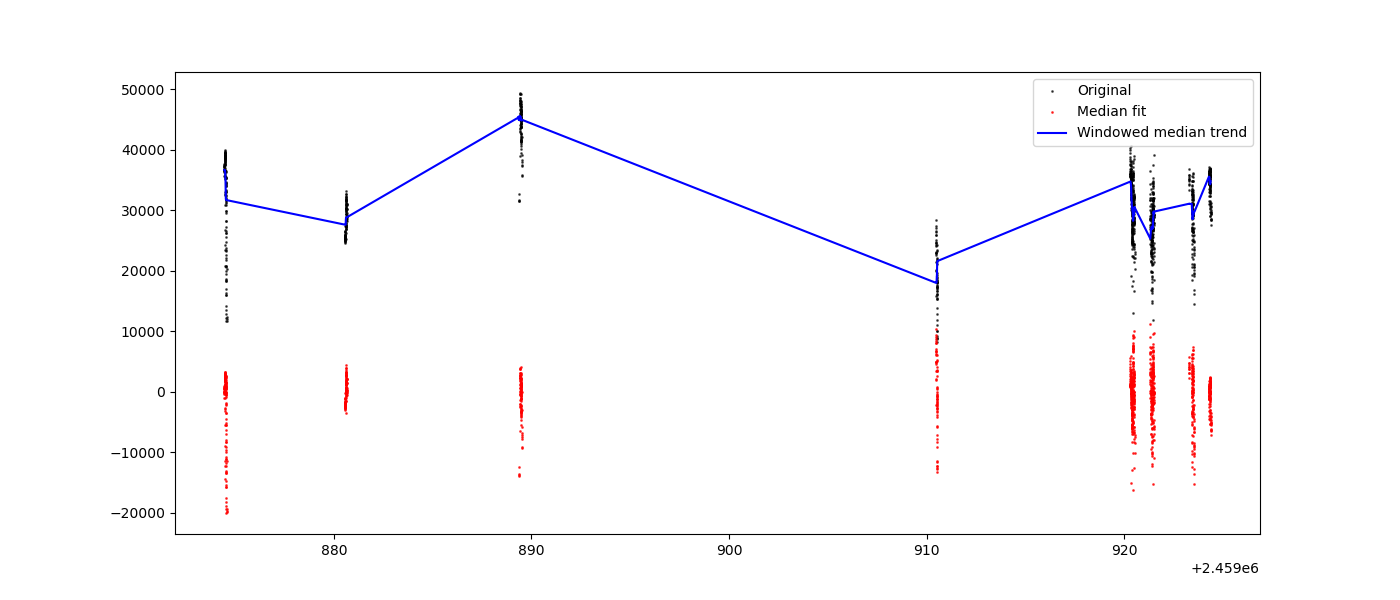

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from astropy.timeseries import TimeSeries

def medianFilterByDate(obsvDate: str):
    dateData = allObjDf[allObjDf['obsv_date'] == obsvDate].copy()
    trend = median_filter(dateData['FLUX'], size=191, mode='mirror')
    dateData['FLUX'] -= trend
    return (dateData, trend)

normalizedDf = pd.concat([medianFilterByDate(d)[0] for d in allObjDf['obsv_date'].unique()], ignore_index=True)
trend = np.concatenate([medianFilterByDate(d)[1] for d in allObjDf['obsv_date'].unique()])

objTimeSeries = TimeSeries(time=allObjDf['OTIME'], 
            data={'mag': allObjDf['MAG']*u.mag, 'err': allObjDf['MERR']*u.mag, 'flux': allObjDf['FLUX']*u.ct, 'ferr': allObjDf['err'], 'obsv_date': allObjDf['obsv_date']})
normalizedTs = TimeSeries(time=allObjDf['OTIME'], 
            data={'mag': normalizedDf['MAG']*u.mag, 'err': normalizedDf['MERR']*u.mag, 'flux': normalizedDf['FLUX']*u.ct, 'ferr': normalizedDf['err'], 'obsv_date': normalizedDf['obsv_date']})

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
ax.plot(objTimeSeries.time.jd, objTimeSeries['flux'], 'k.', markersize=2, label="Original", alpha=0.6)
ax.plot(objTimeSeries.time.jd, normalizedTs['flux'], 'r.', markersize=2, label="Median fit", alpha=0.7)
ax.plot(objTimeSeries.time.jd, trend, color='blue', label="Windowed median trend")
ax.legend()

objTimeSeries

Periodo: 3.415979195839168 hr
Frecuencia: 7.025803912750168 d^-1


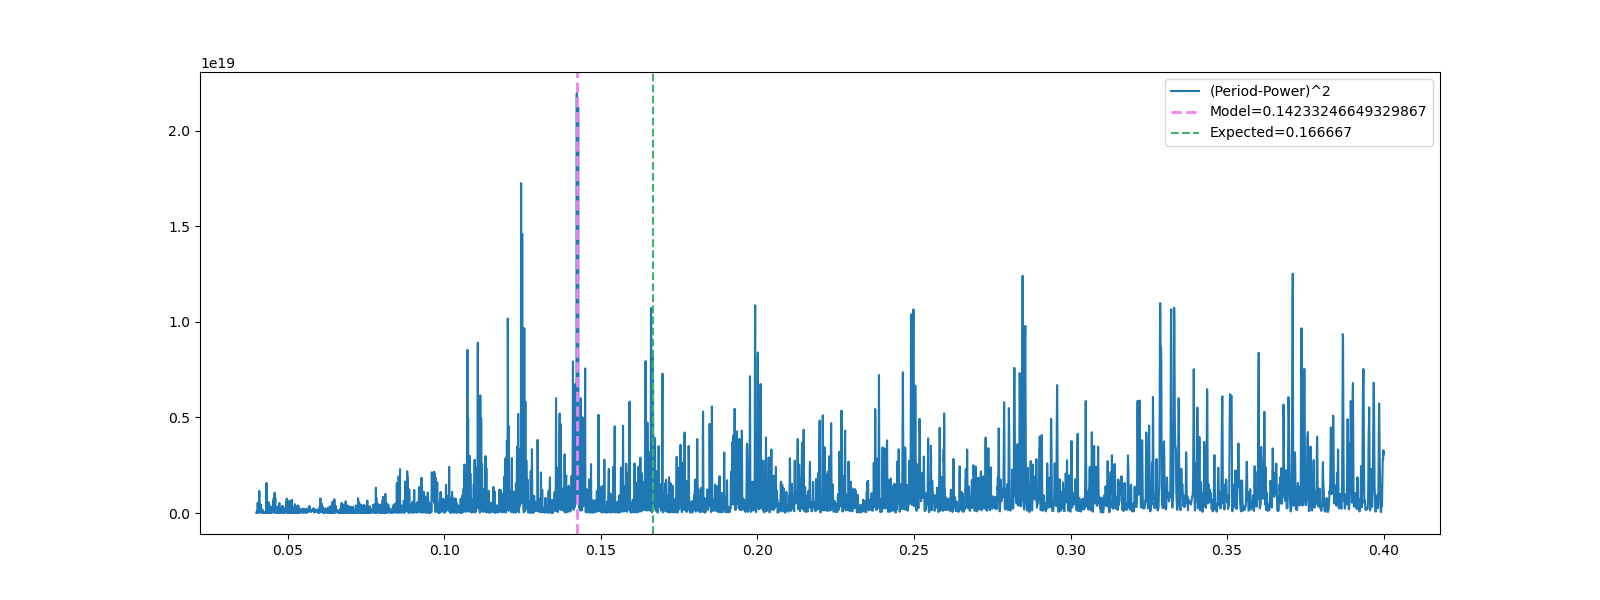

In [4]:
%matplotlib widget

import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares

# import scienceplots
# plt.style.use("science")

# copyTs = objTimeSeries.copy()
# trend = median_filter(copyTs['flux'], size=151, mode='nearest')
# copyTs['flux'] = (copyTs['flux'] - (trend*u.ct)) + np.median(objTimeSeries['flux'])
# copyTs['flux'] = copyTs['flux'] - (trend*u.ct)
# trend = medfilt(copyTs['mag'], 191)
# copyTs['mag'] = (copyTs['mag'] - (trend*u.mag)) + np.median(objTimeSeries['mag'])

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))

# axs[0].plot(objTimeSeries.time_bin_start.jd, objTimeSeries['flux'], 'k.', markersize=3, label="Original")
# axs[0].plot(copyTs.time_bin_start.jd, copyTs['flux'], 'r.', markersize=3, label="Median fit")

# axs[0].plot(objTimeSeries.time_bin_center.jd, objTimeSeries['mag'], 'k.', markersize=3, label="Original", alpha=0.6)
# axs[0].plot(copyTs.time_bin_center.jd, copyTs['mag'], 'r.', markersize=3, label="Median fit")
# axs[0].plot(copyTs.time_bin_center.jd, trend, color='blue', label="Windowed median trend")

# axs[0].plot(objTimeSeries.time.jd, objTimeSeries['mag'], 'k.', markersize=3, label="Original", alpha=0.6)
# axs[0].plot(copyTs.time.jd, copyTs['mag'], 'r.', markersize=3, label="Median fit", alpha=0.7)

# axs[0].plot(objTimeSeries.time.jd, objTimeSeries['flux'], 'k.', markersize=3, label="Original", alpha=0.6)
# axs[0].plot(copyTs.time.jd, copyTs['flux'], 'r.', markersize=3, label="Median fit", alpha=0.7)

# axs[0].plot(copyTs.time.jd, trend, color='blue', label="Windowed median trend")

# model = BoxLeastSquares.from_timeseries(copyTs, signal_column_name="mag", uncertainty="err")
# model = BoxLeastSquares.from_timeseries(objTimeSeries, signal_column_name="mag", uncertainty="err")
model = BoxLeastSquares.from_timeseries(normalizedTs, signal_column_name="flux")

transitDurationsTest = np.linspace(0.005, 0.03, 50)*u.day

periods = np.linspace(0.04, 0.4, 5000)*u.d
explicitPeriodogram = model.power(periods, transitDurationsTest)
bestPeriod = explicitPeriodogram.period[np.argmax(explicitPeriodogram.power)]

ax.plot(explicitPeriodogram.period, np.power(explicitPeriodogram.power, 2), label="(Period-Power)^2")
# axs[2].plot(explicitPeriodogram.period, explicitPeriodogram.power, color="orange", label="Period-Power")
ax.axvline(bestPeriod.value, color='violet', linestyle='--', label=f"Model={bestPeriod.value}", linewidth=2)

ax.axvline(0.166667, color='mediumseagreen', linestyle='--', label="Expected=0.166667")


ax.legend()
print(f"Periodo: {bestPeriod.value * 24} hr")
print(f"Frecuencia: {1.0 / bestPeriod.value} d^-1")
# print(f"(Max power)^2: {autoPeriodogram.power[np.argmax(autoPeriodogram.power)]**2}, {explicitPeriodogram.power[np.argmax(explicitPeriodogram.power)]**2}")

In [5]:
index = np.argmax(explicitPeriodogram.power)

period = explicitPeriodogram.period[index]
transitTime = explicitPeriodogram.transit_time[index]
transitDuration = explicitPeriodogram.duration[index]

periodogramStats = model.compute_stats(period, transitDuration, transitTime)
periodogramStats

{'transit_times': <Time object: scale='utc' format='datetime64' value=['2022-10-22T01:17:38.641000000' '2022-10-22T04:42:36.166105021'
  '2022-10-22T08:07:33.691210042' '2022-10-22T11:32:31.216315063'
  '2022-10-22T14:57:28.741420084' '2022-10-22T18:22:26.266525105'
  '2022-10-22T21:47:23.791630126' '2022-10-23T01:12:21.316735147'
  '2022-10-23T04:37:18.841840168' '2022-10-23T08:02:16.366945189'
  '2022-10-23T11:27:13.892050210' '2022-10-23T14:52:11.417155231'
  '2022-10-23T18:17:08.942260252' '2022-10-23T21:42:06.467365273'
  '2022-10-24T01:07:03.992470294' '2022-10-24T04:32:01.517575315'
  '2022-10-24T07:56:59.042680336' '2022-10-24T11:21:56.567785357'
  '2022-10-24T14:46:54.092890378' '2022-10-24T18:11:51.617995399'
  '2022-10-24T21:36:49.143100420' '2022-10-25T01:01:46.668205441'
  '2022-10-25T04:26:44.193310462' '2022-10-25T07:51:41.718415483'
  '2022-10-25T11:16:39.243520504' '2022-10-25T14:41:36.768625525'
  '2022-10-25T18:06:34.293730546' '2022-10-25T21:31:31.818835567'
  '2022

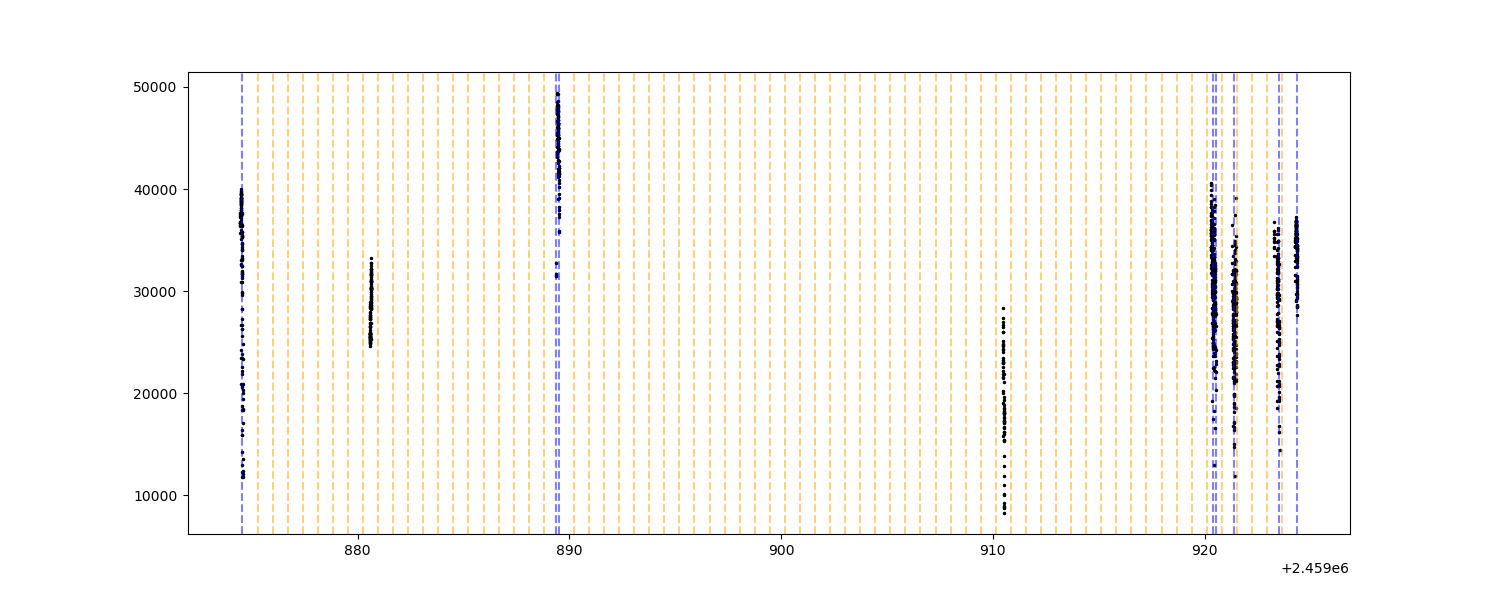

In [6]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

ax.plot(objTimeSeries.time.jd, objTimeSeries['flux'], 'k.', markersize=3, label="Original")

i = 0
for tt in periodogramStats['transit_times']:
    if periodogramStats['per_transit_count'][i] != 0 or i % 5 == 0:
        lineColor = "blue" if periodogramStats['per_transit_count'][i] != 0 else "orange"
        ax.axvline(tt.jd, linestyle='--', color=lineColor, alpha=0.5)
    i = i + 1

time,mag,err,flux,ferr,obsv_date
,mag,mag,ct,,
float64,float64,float64,float64,float64,object
0.3009325106813579,18.014,0.014,37382.02,482.0376531270147,2022-10-21
0.3058422790684413,18.044,0.012,36357.11,401.8470295661785,2022-10-21
0.3107615615649913,18.019,0.013,37214.78,445.6038868932485,2022-10-21
0.31567043546315077,18.006,0.01,37644.18,346.7272727272727,2022-10-21
0.3205921574749467,18.035,0.009,36665.2,303.9392097264437,2022-10-21
0.3255007874215813,18.031,0.011,36779.08,372.6350557244174,2022-10-21
0.33043682125616325,18.039,0.009,36516.93,302.7101132909643,2022-10-21
0.3353461017401974,18.064,0.01,35702.03,328.8388136686009,2022-10-21


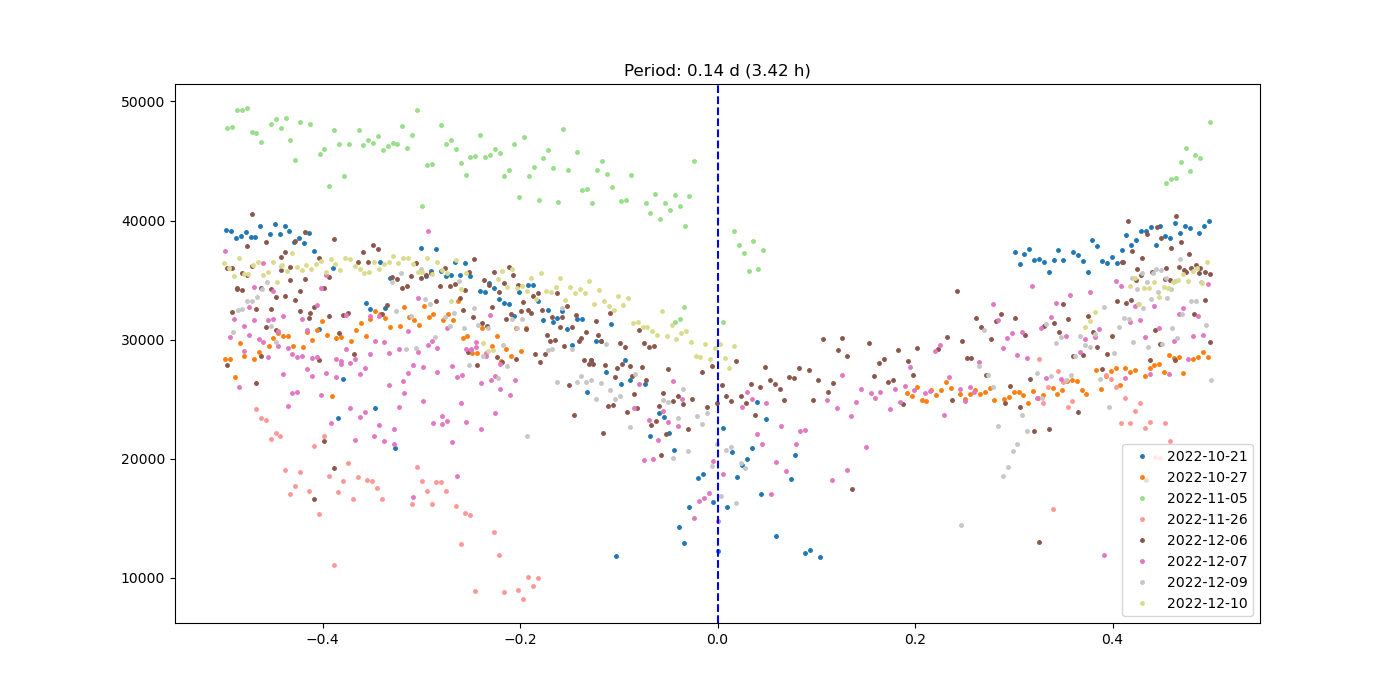

In [7]:
import numpy as np
from matplotlib import cm

# period = 0.124*u.day

tsObsvDates = allObjDf['obsv_date'].unique()

cmap = cm.get_cmap('tab20')
dateColors = [cmap(c) for c in np.linspace(0.001, 1, len(OBSV_DATES_APERS), endpoint=False)]

figure, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7))
foldedTs = objTimeSeries.fold(period=period, epoch_time=transitTime, normalize_phase=True)

for obsvDate, color in zip(tsObsvDates, dateColors):
    obsvPoints = foldedTs[objTimeSeries['obsv_date'] == obsvDate]
    ax.plot(obsvPoints.time.value, obsvPoints['flux'], '.', color=color, markersize=5, label=obsvDate)
ax.legend()
ax.axvline(0, linestyle='--', color='blue')
ax.set_title(f"Period: {period:.2f} ({period.value * 24:.2f} h)")
foldedTs